# UnitCell: Bandstructures and energy spectra
In this notebook we will start exploring the different calculations available in the UnitCell class. 
We will show how to compute the bandstructure of a UnitCell and how to plot the eigenstates of the Cell 

In [11]:
from GraphCodes.UnitCell import UnitCell
import numpy as np
import matplotlib.pyplot as plt

In [12]:
cell = UnitCell('kagome')

## Generating the hamiltonian and energy spectrum

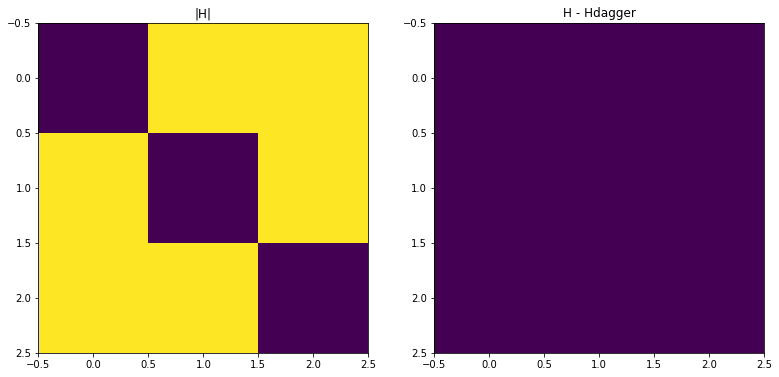

In [13]:
#Here we generate an instantiation of the Bloch matrix at a given momentum point (0,0) in this case
H_mat = cell.generate_Bloch_matrix(kx=0, ky=0, modeType='FW')
plt.figure(figsize=(13,8))
plt.clf()
ax = plt.subplot(1,2,1)
plt.imshow(np.abs(H_mat))
plt.title('|H|')
#We can very that H is hermitian as well
ax = plt.subplot(1,2,2)
plt.imshow(np.real(H_mat - np.transpose(np.conj(H_mat))))
plt.title('H - Hdagger')

plt.show()

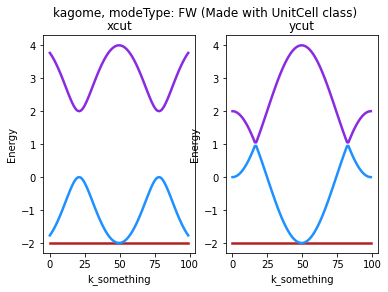

In [18]:
# We can plot a few different cuts through the band structure since the Brillouin zone is 2D

modeType = 'FW'
kx_x, ky_y, cutx = cell.compute_band_structure(-2*np.pi, 0, 2*np.pi, 0, numsteps = 100, modeType = modeType)
kx_y, ky_y, cuty = cell.compute_band_structure(0, -2*np.pi, 0, 2*np.pi, numsteps = 100, modeType = modeType)

fig2 = plt.figure(4)
plt.clf()
ax = plt.subplot(1,2,1)
cell.plot_band_cut(ax, cutx)
plt.title('xcut')

ax = plt.subplot(1,2,2)
cell.plot_band_cut(ax, cuty)
plt.title('ycut')

titleStr = cell.type + ', modeType: ' + modeType + ' (Made with UnitCell class)' 
plt.suptitle(titleStr)

plt.show()

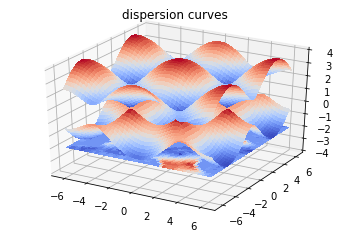

In [19]:
# If we want to plot the full energy surface we have to compute the bloch energy at a bunch of different slices 
#########
#surface plots
########
plotAllBands = True
import matplotlib.pyplot as plt
from matplotlib import cm

numSurfPoints = 50
xs = np.linspace(-2*np.pi, 2*np.pi, numSurfPoints)
ys = np.linspace(-2*np.pi, 2*np.pi, numSurfPoints)

Xgrid, Ygrid = np.meshgrid(xs, ys)

bands = np.zeros((cell.numSites, len(xs), len(ys)))

#####compute surfaces
for xind in range(0,len(xs)):
    for yind in range(0,len(ys)):
        xval = xs[xind]
        yval = ys[yind]
        kx,yk, Es = cell.compute_band_structure(xval, yval, xval, yval, numsteps = 1, modeType = 'FW')
        bands[:, xind, yind] = np.transpose(Es)

####plot all surfaces together
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
for ind in range(0,cell.numSites):
    surf = ax.plot_surface(Xgrid, Ygrid, bands[ind,:,:], cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_zlim(-4, 4)
#    ax.set_zlim(-4*J, 4*J)

plt.title('dispersion curves')
plt.show()